In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Tight binding chains
- *Author: Chen Huang*
- *Date: 05 Feb 2024*

## Uniform chain and alternating chain

In [2]:
def energy(k_vec, v, w):
    """
    Calculate the energy of a one-dimensional chain.

    Parameters:
    k_vec (float): The wave vector of the particle.
    v (float): The intra-cell hopping parameter.
    w (float): The inter-cell hopping parameter.

    Returns:
    float: The energy of the chain in fixed position.
    """
    return np.sqrt(v ** 2 + w ** 2 + 2 * v * w * np.cos(k_vec))


The band gap for alternating chain:  2.0


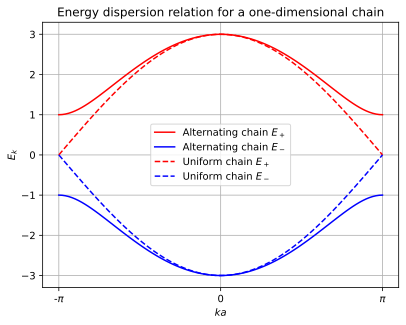

In [3]:
k = np.linspace(-np.pi, np.pi, 100)

# Calculate the band gap for the uniform chain
print("The band gap for alternating chain: ", 2 * energy(k[0], 1, 2))

# Plot the energy dispersion relation
plt.plot(k, energy(k, 1, 2), 'r')
plt.plot(k, -energy(k, 1, 2), 'b')
plt.plot(k, energy(k, 1.5, 1.5), 'r--')
plt.plot(k, -energy(k, 1.5, 1.5), 'b--')

# Add labels and title
plt.legend(['Alternating chain $E_+$', 'Alternating chain $E_-$', 'Uniform chain $E_+$', 'Uniform chain $E_-$'])
plt.xlabel('$ka$')
plt.ylabel('$E_k$')
plt.xticks([-np.pi, 0, np.pi], ['-$\pi$', '0', '$\pi$']) # Set the x-axis ticks
plt.title('Energy dispersion relation for a one-dimensional chain')
plt.grid()
plt.show()

## Semi-infinite Su-Schrieffer-Heeger (SSH) model
Suppose the $B$-site is on left edge, and the first hopping integral is denoted as $w$. We can write the Hamiltonian for the semi-infinite SSH chain as
$$
    \hat{H}=-\sum_{n=0}\left[v(\ket{n,A}\bra{n,B}+\ket{n,B}\bra{n,A})+w(\ket{n,B}\bra{n+1,A}+\ket{n+1,A}\bra{n,B})\right].
$$
The eigenstate at energy $E$
$$
    \ket{\psi}=\sum_{n=0}(c_{n,A}\ket{n,A}+c_{n,B}\ket{n,B}).
$$

In [4]:
def altHamiltonian(num_sites, w, v):
    """
    This function calculates the Hamiltonian matrix for an alternating chain.

    Parameters:
    num_sites (int): The total number of sites in the chain.
    ratio (float): The ratio of intercell hopping to intracell hopping.

    Returns:
    numpy.ndarray: The Hamiltonian matrix for the alternating chain.
    """

    num_cells = int(num_sites / 2)  # Number of unit cells in the chain 

    # Construct the Hamiltonian matrix
    H = np.zeros((num_sites, num_sites))
    for j in range(num_cells):
        # Intercell hopping
        H[2*j, 2*j+1] = w
        H[2*j+1, 2*j] = w
        if j > 0:
            H[2*j-1, 2*j] = v
            H[2*j, 2*j-1] = v
    if num_sites%2 != 0:
        H[-2, -1] = v
        H[-1, -2] = v

    return H


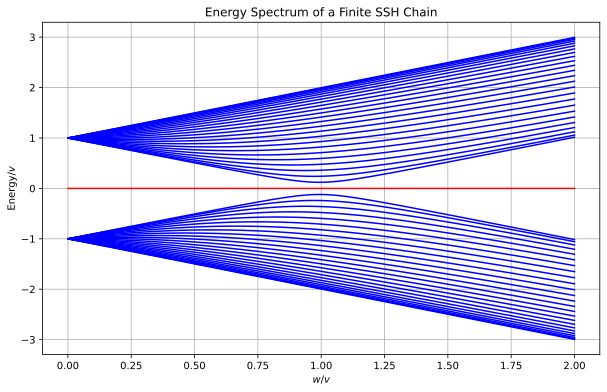

In [5]:
# Define parameters
num_sites = 51  # Total number of sites
v = 1.0  # Intracell hopping parameter 
w_list = np.linspace(0, 2, 100)  # Intracell hopping parameter 

# Initialize an array to store energy values for each w/v
energy_spectrum = np.zeros((len(w_list), num_sites))

for i, w in enumerate(w_list):
    eigenvalues, eigenvectors = np.linalg.eigh(altHamiltonian(num_sites, w, v))
    energy_spectrum[i, :] = eigenvalues

# Plot the energy spectrum vs. w/v
plt.figure(figsize=(10, 6))
for i in range(num_sites):
    if np.any(energy_spectrum[:, i] == 0):
        plt.plot(w_list/v, energy_spectrum[:, i]/v, color='red')
    else:
        plt.plot(w_list/v, energy_spectrum[:, i]/v, color='blue')

plt.xlabel('$w/v$')
plt.ylabel('Energy/$v$')
plt.title('Energy Spectrum of a Finite SSH Chain')
plt.grid(True)


### The probability distribution of the zero-energy state

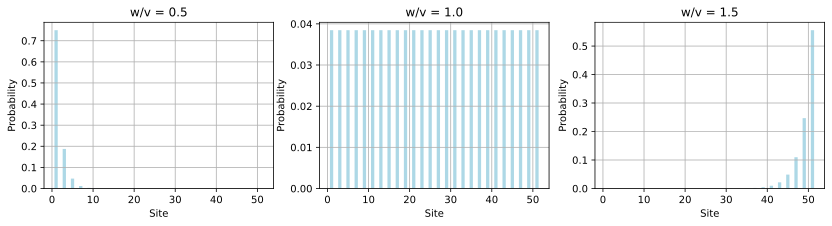

In [6]:
# Define parameters
v = 1.0
w_list = [0.5, 1, 1.5]  # w/v values

fig, axes = plt.subplots(1, 3, figsize=(14, 3))
# Plot the probability distribution of the zero-energy state
for w, ax in zip(w_list, axes):
    eigenvalues, eigenvectors = np.linalg.eigh(altHamiltonian(num_sites, w, v))  # Solve the eigenproblem

    zero_energy_index = np.argmin(np.abs(eigenvalues)) # Find the index of the zero-energy state
    zero_energy_eigenvector = eigenvectors[:, zero_energy_index] # Extract the zero-energy eigenvector

    # Plot the probability distribution of the zero-energy state
    ax.bar(range(1, num_sites + 1), abs(zero_energy_eigenvector)**2, color='lightblue') 
    ax.set_xlabel('Site') 
    ax.set_ylabel('Probability')  
    ax.set_title(f'w/v = {w/v}')
    ax.grid(True)

